In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from dfply import *
from prince import MCA
import statsmodels.api as sm
from statsmodels.formula.api import ols



In [33]:

df = pd.read_excel('/Users/deepbhandari/Desktop/output.xlsx')
pd.set_option('display.max_columns', None)

km = pd.read_excel('/Users/deepbhandari/Downloads/AKI data additional (1).xlsx')
orig = pd.read_excel('/Users/deepbhandari/Downloads/230302 BAYN AKI - UPDATED (1).xlsx')



In [34]:
# Check if km and orig have the same columns
if set(km.columns) == set(orig.columns):
    print("km and orig have the same columns.")
    print("Columns:", km.columns)
else:
    print("km and orig do not have the same columns.")
    print("Columns in km:", km.columns)
    print("Columns in orig:", orig.columns)


km and orig have the same columns.
Columns: Index(['NHS NUMBER', 'Unnamed: 1', 'Participant Id', 'Participant Status',
       'Site Abbreviation', 'Participant Creation Date', 'DATE OF SURGERY',
       'risk_heart_transplant', 'risk_transplant', 'risk_dialysis',
       ...
       'followup90d_creatinine_calc', 'followup90d_creatinine_mgdl',
       'followup90d_creatinine_umolL', 'followup90d_creatinine_value_calc',
       'followup90d_creatinine_day', 'followup90d_dialysis',
       'clinician_comments', 'cddi_comments', 'SURVIVAL', 'CENSOR'],
      dtype='object', length=180)


In [3]:
merged_df = pd.concat([km, orig], ignore_index=True)

merged_df.shape


(1441, 180)

RENAMING

In [4]:
df['followup_d7alive'] = df['followup_d7alive'].replace({"(?i)yes": 0, "(?i)no": 1}, regex=True)
df['risk_diabetes_treatment'] = df['risk_diabetes_treatment'].replace({"(?i)yes": 1, "(?i)no": 0}, regex=True)
df['admission_sex'] = df['admission_sex'].replace({r"1\. Male\s*": 1, r"2\. Female\s*": 0}, regex=True)
df['admission_cath_to_surgery'].replace({"1\. Elective\s*": 'Elective', "2\. Urgent\s*": 'Urgent', "3\. Emergency\s*": 'Emergency'}, regex=True, inplace=True)

df['followup_renal_replacement'] = df['followup_renal_replacement'].fillna(0)
df['followup_renal_replacement'] = df['followup_renal_replacement'].apply(lambda x: 1 if x != 0 else 0)
df.rename(columns={'prepostsurgery_measurements_Day_of_surgery_value_post_surgery__Serum_creatinine_unit_as_mentioned_above_': 'baseline'}, inplace=True)


<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/var/folders/y3/fw9x268x47l0njv69jv6qkz80000gn/T/ipykernel_10605/3710335420.py:4: SyntaxWarning: invalid escape sequence '\.'
  df['admission_cath_to_surgery'].replace({"1\. Elective\s*": 'Elective', "2\. Urgent\s*": 'Urgent', "3\. Emergency\s*": 'Emergency'}, regex=True, inplace=True)
/var/folders/y3/fw9x268x47l0njv69jv6qkz80000gn/T/ipykernel_10605/3710335420.py:4: SyntaxWarning: invalid escape sequence '\.'
  df['admission_cath_to_surgery'].replace({"1\. Elective\s*": 'Elective', "2\. Urgent\s*": 'Urgent', "3\. Emergency\s*": 'Emergency'}, regex=True, inplace=True)
/var/folders/y3/fw9x268x47l0njv69jv6qkz80000gn/T/ipykernel_10605/3710335420.py:4: SyntaxWarning: invalid escape sequence '\.'


In [29]:
######UNNCORPORATE THESE INTO NUMERICAL ##########
#'surgery_duration_time_of_extracorporeal_circulation_minutes',
#'surgery_duration_aortic_clamp_time_minutes', 'surgery_reexploration',
#'presurgery_albumin'

#Renaming
df.rename(columns={'risk_other_which#heart_failure': 'heart_failure'}, inplace=True)
df.rename(columns={'prepostsurgery_measurements_Last_measurement_pre_surgery_within_7_days_prior_to_surgery__eGFR_in_mL_min_1.73m2_': 'preop_creat'}, inplace=True)
df.rename(columns={'risk_other_which#systemic_hypertension': 'htn'}, inplace=True)

#### EXTRACTING THE HIGHEST POST OP CREATININE VALUE ####
df['prepostsurgery_measurements_Day_2_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(df['prepostsurgery_measurements_Day_2_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
df['prepostsurgery_measurements_Day_3_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(df['prepostsurgery_measurements_Day_3_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
df['prepostsurgery_measurements_Day_4_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(df['prepostsurgery_measurements_Day_4_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
df['prepostsurgery_measurements_Day_5_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(df['prepostsurgery_measurements_Day_5_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
df['prepostsurgery_measurements_Day_6_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(df['prepostsurgery_measurements_Day_6_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
df['prepostsurgery_measurements_Day_7_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(df['prepostsurgery_measurements_Day_7_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')

df['surgery_duration_aortic_clamp_time_minutes'] = pd.to_numeric(df['surgery_duration_aortic_clamp_time_minutes'], errors='coerce')
df['surgery_duration_time_of_extracorporeal_circulation_minutes'] = pd.to_numeric(df['surgery_duration_time_of_extracorporeal_circulation_minutes'], errors='coerce')


merged_df['prepostsurgery_measurements_Day_2_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(merged_df['prepostsurgery_measurements_Day_2_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
merged_df['prepostsurgery_measurements_Day_3_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(merged_df['prepostsurgery_measurements_Day_3_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
merged_df['prepostsurgery_measurements_Day_4_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(merged_df['prepostsurgery_measurements_Day_4_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
merged_df['prepostsurgery_measurements_Day_5_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(merged_df['prepostsurgery_measurements_Day_5_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
merged_df['prepostsurgery_measurements_Day_6_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(merged_df['prepostsurgery_measurements_Day_6_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
merged_df['prepostsurgery_measurements_Day_7_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(merged_df['prepostsurgery_measurements_Day_7_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')

 
km['prepostsurgery_measurements_Day_2_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(km['prepostsurgery_measurements_Day_2_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
km['prepostsurgery_measurements_Day_3_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(km['prepostsurgery_measurements_Day_3_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
km['prepostsurgery_measurements_Day_4_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(km['prepostsurgery_measurements_Day_4_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
km['prepostsurgery_measurements_Day_5_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(km['prepostsurgery_measurements_Day_5_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
km['prepostsurgery_measurements_Day_6_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(km['prepostsurgery_measurements_Day_6_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')
km['prepostsurgery_measurements_Day_7_Serum_creatinine_unit_as_mentioned_above_'] = pd.to_numeric(km['prepostsurgery_measurements_Day_7_Serum_creatinine_unit_as_mentioned_above_'], errors='coerce')



In [10]:
df['followup_renal_replacement'].value_counts()

followup_renal_replacement
0    1379
1      62
Name: count, dtype: int64

In [25]:
km['followup_renal_replacement'].value_counts()

followup_renal_replacement
23.0     1
130.0    1
63.0     1
456.0    1
32.0     1
80.0     1
76.0     1
Name: count, dtype: int64

In [20]:
# Finding the stage of AKI for those who received renal_replacement therapy

# Filter the DataFrame where followup_renal_replacement is equal to 1
filtered_df = df[df['followup_renal_replacement'] == 1]

# Extract the AKI_stage values for the filtered rows
aki_stages_for_renal_replacement_1 = filtered_df['AKI_stage']

# Create a new DataFrame with AKI_stage as a column
aki_stages_df = pd.DataFrame(aki_stages_for_renal_replacement_1, columns=['AKI_stage'])




In [22]:
aki_stages_df['AKI_stage'].value_counts()

AKI_stage
No AKI         45
AKI stage 2     9
AKI stage 1     7
AKI stage 3     1
Name: count, dtype: int64

In [11]:
# Check if each column is numerical
for column in df[['preop_creat', 'prepostsurgery_measurements_Day_2_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_3_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_4_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_5_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_6_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_7_Serum_creatinine_unit_as_mentioned_above_']].columns:
    if df[column].dtype in ['int64', 'float64']:
        print(f"{column} is numerical")
    else:
        print(f"{column} is not numerical")


preop_creat is numerical
prepostsurgery_measurements_Day_2_Serum_creatinine_unit_as_mentioned_above_ is numerical
prepostsurgery_measurements_Day_3_Serum_creatinine_unit_as_mentioned_above_ is numerical
prepostsurgery_measurements_Day_4_Serum_creatinine_unit_as_mentioned_above_ is numerical
prepostsurgery_measurements_Day_5_Serum_creatinine_unit_as_mentioned_above_ is numerical
prepostsurgery_measurements_Day_6_Serum_creatinine_unit_as_mentioned_above_ is numerical
prepostsurgery_measurements_Day_7_Serum_creatinine_unit_as_mentioned_above_ is numerical


In [12]:
subset_df = df[['preop_creat', 'prepostsurgery_measurements_Day_2_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_3_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_4_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_5_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_6_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_7_Serum_creatinine_unit_as_mentioned_above_', 'Participant Id']]
max_values = df[['preop_creat', 'prepostsurgery_measurements_Day_2_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_3_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_4_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_5_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_6_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_7_Serum_creatinine_unit_as_mentioned_above_']].max(axis=1)
df['max_value'] = max_values


In [30]:
km.rename(columns={'prepostsurgery_measurements_Day_of_surgery_value_post_surgery__Serum_creatinine_unit_as_mentioned_above_': 'baseline'}, inplace=True)
km_max = km[['baseline', 'prepostsurgery_measurements_Day_2_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_3_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_4_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_5_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_6_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_7_Serum_creatinine_unit_as_mentioned_above_']].max(axis=1)
km['max_value'] = km_max


In [13]:
merged_max_values = merged_df[['prepostsurgery_measurements_Day_of_surgery_value_post_surgery__Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_2_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_3_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_4_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_5_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_6_Serum_creatinine_unit_as_mentioned_above_', 'prepostsurgery_measurements_Day_7_Serum_creatinine_unit_as_mentioned_above_']].max(axis=1)
merged_df['max_value'] = merged_max_values


In [14]:
merged_df.rename(columns={'prepostsurgery_measurements_Day_of_surgery_value_post_surgery__Serum_creatinine_unit_as_mentioned_above_': 'baseline'}, inplace=True)


In [31]:
#redefine AKI from stage to binary
def label_stage(row):
    if row['max_value'] >= 1.5 * row['baseline'] :
        return 'AKI'
    else:
        return 'No AKI'
km['AKI_or_not'] = km.apply(label_stage, axis=1)

km['AKI_or_not'].value_counts()

AKI_or_not
No AKI    327
Name: count, dtype: int64

In [23]:
#redefine AKI from stage to binary
def label_stage(row):
    if row['max_value'] >= 1.5 * row['baseline'] :
        return 'AKI'
    else:
        return 'No AKI'
df['AKI_or_not'] = df.apply(label_stage, axis=1)

df['AKI_or_not'].value_counts()

AKI_or_not
No AKI    1169
AKI        272
Name: count, dtype: int64

In [24]:
#redefine AKI from stage to binary
def label_stage(row):
    if row['max_value'] >= 1.5 * row['baseline'] :
        return 'AKI'
    else:
        return 'No AKI'
merged_df['AKI_or_not'] = merged_df.apply(label_stage, axis=1)

merged_df['AKI_or_not'].value_counts()


AKI_or_not
No AKI    1378
AKI         63
Name: count, dtype: int64

In [17]:
# Define a function to check the condition and label the row accordingly
def label_stage(row):
    if row['max_value'] >= 1.5 * row['baseline'] and row['max_value'] <= 1.9 * row['baseline']:
        return 'AKI stage 1'
    elif row['max_value'] >= 2.0 * row['baseline'] and row['max_value'] <= 2.9 * row['baseline']:
        return 'AKI stage 2'
    elif row['max_value'] >= 3.0 * row['baseline']:
        return 'AKI stage 3'
    else:
        return 'No AKI'

# Apply the function to create the new column
df['AKI_stage'] = df.apply(label_stage, axis=1)

df['AKI_stage'].value_counts()



AKI_stage
No AKI         1191
AKI stage 1     154
AKI stage 2      73
AKI stage 3      23
Name: count, dtype: int64

In [18]:
##### group by AKI stage and comparing mrean pre-op creatinine with mean highest creat post op #####
df >> group_by(X.AKI_stage) >> summarize(n=X['preop_creat'].count(), mean=X['preop_creat'].mean(), std=X['preop_creat'].std())
df >> group_by(X.AKI_stage) >> summarize(n=X['max_value'].count(), mean=X['max_value'].mean(), std=X['max_value'].std())


,AKI_stage,n,mean,std
0,AKI stage 1,154,117.370133,42.148714
1,AKI stage 2,73,153.273655,71.921446
2,AKI stage 3,23,162.084099,21.339772
3,No AKI,1191,109.155490,39.496046


                     sum_sq      df         F    PR(>F)
C(AKI_stage)    1019.610509     3.0  2.154508  0.091604
Residual      226684.476674  1437.0       NaN       NaN


/var/folders/y3/fw9x268x47l0njv69jv6qkz80000gn/T/ipykernel_1098/3213409809.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AKI_stage', y='followup_hospital', data=df, ci=None)  # 'sd' for standard deviation


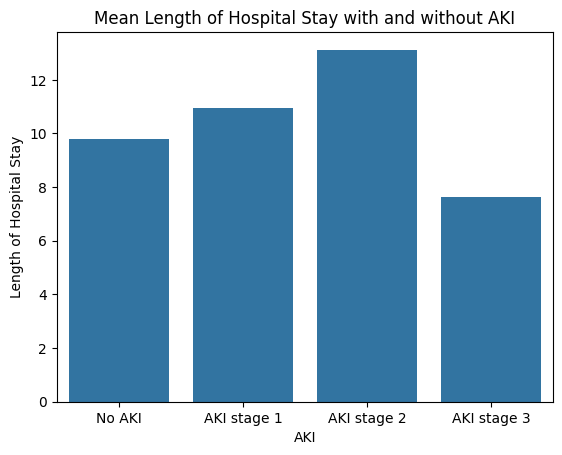

In [140]:
#### ANOVA correlating AKI stage to lenngth of stay #######################################################################################
#followup_hospital

# Reorder the categories of AKI_stages
df['AKI_stage'] = pd.Categorical(df['AKI_stage'], categories=['No AKI','AKI stage 1','AKI stage 2','AKI stage 3' ], ordered=True)


# Fit the ANOVA model
model = ols('followup_hospital ~ C(AKI_stage)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

# Plotting the means with confidence intervals
sns.barplot(x='AKI_stage', y='followup_hospital', data=df, ci=None)  # 'sd' for standard deviation
plt.xlabel('AKI')
plt.ylabel('Length of Hospital Stay')
plt.title('Mean Length of Hospital Stay with and without AKI')
plt.show()




In [132]:
print(anova_table)

                     sum_sq      df         F    PR(>F)
C(AKI_stage)    1019.610509     3.0  2.154508  0.091604
Residual      226684.476674  1437.0       NaN       NaN


In [21]:
##### chi squared #########################################################################################################################
from scipy.stats import chi2_contingency

# mortality
df['followup_d7alive'].value_counts()
df['followup90d_death'].value_counts()

#redefine AKI from stage to binary
def label_stage(row):
    if row['max_value'] >= 1.5 * row['baseline'] :
        return 'AKI'
    else:
        return 'No AKI'
df['AKI_or_not'] = df.apply(label_stage, axis=1)

df['AKI_or_not'].value_counts()


# Create a contingency table
contingency_table = pd.crosstab(df['followup_d7alive'], df['AKI_or_not'])

# Perform chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(contingency_table)
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Interpret the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("There is a significant association between mortality and development of AKI at 7 days post op (reject the null hypothesis)")
else:
    print("There is no significant association between mortality and development of AKI at 7 days post op (fail to reject the null hypothesis)")

# Interpret the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("There is a significant association between mortality and development of AKI at 90 days post op (reject the null hypothesis)")
else:
    print("There is no significant association between mortality and development of AKI at 90 days post op (fail to reject the null hypothesis)")



AKI_or_not        AKI  No AKI
followup_d7alive             
0                  72    1359
1                   1       9
Chi-squared statistic: 0.0
p-value: 1.0
Degrees of freedom: 1
Expected frequencies table:
[[7.24934074e+01 1.35850659e+03]
 [5.06592644e-01 9.49340736e+00]]
There is no significant association between mortality and development of AKI at 7 days post op (fail to reject the null hypothesis)
There is no significant association between mortality and development of AKI at 90 days post op (fail to reject the null hypothesis)


In [43]:
#######  MANOVA  CATEGORICAL VARIABLES vs MAX POST OP CREAT/LENGTH OF STAY ####################################################################################################

from statsmodels.multivariate.manova import MANOVA

# Define dependent variables (as a list)
dependent_vars = ['risk_transplant', 'risk_dialysis',
       'risk_ecmo', 'risk_lvad', 'risk_perioperative_death',
       'admission_cath_to_surgery', 'risk_which#diabetes',
       'risk_other_which#heart_failure', 'risk_other_which#history_of_smoking',
       'risk_other_which#peripheral_vascular_disease',
       'risk_other_which#systemic_hypertension', 'risk_other_which#COPD',
       'risk_other_which#cerebrovascular_disease',
       'risk_other_which#recent_3_months_before_myocardial_infarct',
       'risk_other_which#prior_cardiac_surgery', 'admission_risk_hf_nyha',
       'admission_risk_hf_ejection_fraction', 'admission_risk_smoking',
       'admission_sex', 'admission_medication_class#insulin_ATC_code_A10A',
       'surgery_which#coronary_artery_bypass_graft_CABG',
       'surgery_which#aortic_valve_repair__replacement_AVR',
       'surgery_which#mitral_valve_repair__replacement_MVR',
       'surgery_which#aortic_surgery', 'surgery_which#other']

# Define independent variable (grouping factor)
independent_var = 'max_value'
independent_vars = ['max_value', 'followup_hospital']

# Fit the MANOVA model
manova_model = MANOVA.from_formula(formula='risk_transplant + risk_dialysis + risk_ecmo ~ max_value', data=df)

#print(manova_model.summary())

mv_test_results = manova_model.mv_test()
print(mv_test_results)


                                  Multivariate linear model
                                                                                              
----------------------------------------------------------------------------------------------
       Intercept                Value         Num DF   Den DF          F Value          Pr > F
----------------------------------------------------------------------------------------------
          Wilks' lambda                0.0000 3.0000 1434.0000 1435147081255397632.0000 0.0000
         Pillai's trace                1.0000 3.0000 1434.0000 1435147081255397632.0000 0.0000
 Hotelling-Lawley trace 3002399751580329.5000 3.0000 1434.0000 1435147081255397376.0000 0.0000
    Roy's greatest root 3002399751580329.5000 3.0000 1434.0000 1435147081255397376.0000 0.0000
----------------------------------------------------------------------------------------------
                                                                                     

In [48]:
X = df[['admission_risk_mortality_euroscore', 'admission_age', 'admission_sex', 'presurgery_hemoglobin_gdl', 'preop_creat']]
y = df['max_value']

y = y.dropna()
missing_y_indices = y[y.isnull()].index
X_clean = X.drop(index=missing_y_indices)

endog_aligned, exog_aligned = X_clean.align(y, join='inner', axis=0)

#X_clean = sm.add_constant(X_clean)

family = sm.families.Gaussian()
#model = sm.OLS(y, X_clean)
model = sm.OLS(exog_aligned, endog_aligned)
results = model.fit()




In [49]:
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:              max_value   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                              1425.
Date:                Wed, 06 Mar 2024   Prob (F-statistic):                        0.00
Time:                        19:49:09   Log-Likelihood:                         -7570.8
No. Observations:                1438   AIC:                                  1.515e+04
Df Residuals:                    1433   BIC:                                  1.518e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [90]:
X = df[['admission_risk_mortality_euroscore', 'admission_age', 'admission_sex', 'presurgery_hemoglobin_gdl', 'preop_creat', 'surgery_duration_aortic_clamp_time_minutes', 'surgery_duration_time_of_extracorporeal_circulation_minutes']]
y = df['max_value']

X = X.dropna()
y = y.dropna()
missing_y_indices = y[y.isnull()].index
X_clean = X.drop(index=missing_y_indices)

endog_aligned, exog_aligned = X_clean.align(y, join='inner', axis=0)

#X_clean = sm.add_constant(X_clean)

family = sm.families.Gaussian()
#model = sm.OLS(y, X_clean)
model = sm.OLS(exog_aligned, endog_aligned)
results = model.fit()



In [70]:
# Check if each column is numerical
for column in df[['admission_risk_mortality_euroscore', 'admission_age', 'admission_sex', 'presurgery_hemoglobin_gdl', 'preop_creat', 'surgery_duration_aortic_clamp_time_minutes', 'surgery_duration_time_of_extracorporeal_circulation_minutes']]:
    if df[column].dtype in ['int64', 'float64']:
        print(f"{column} is numerical")
    else:
        print(f"{column} is not numerical")


admission_risk_mortality_euroscore is numerical
admission_age is numerical
admission_sex is numerical
presurgery_hemoglobin_gdl is numerical
preop_creat is numerical
surgery_duration_aortic_clamp_time_minutes is numerical
surgery_duration_time_of_extracorporeal_circulation_minutes is numerical


In [91]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              max_value   R-squared (uncentered):                   0.845
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              1102.
Date:                Thu, 07 Mar 2024   Prob (F-statistic):                        0.00
Time:                        14:45:40   Log-Likelihood:                         -7423.3
No. Observations:                1422   AIC:                                  1.486e+04
Df Residuals:                    1415   BIC:                                  1.490e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                                                  coef    std err          t      P>|t|      [0.025     

/Users/deepbhandari/miniconda3/envs/CTS_env/lib/python3.12/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
/Users/deepbhandari/miniconda3/envs/CTS_env/lib/python3.12/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
/Users/deepbhandari/miniconda3/envs/CTS_env/lib/python3.12/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as pos

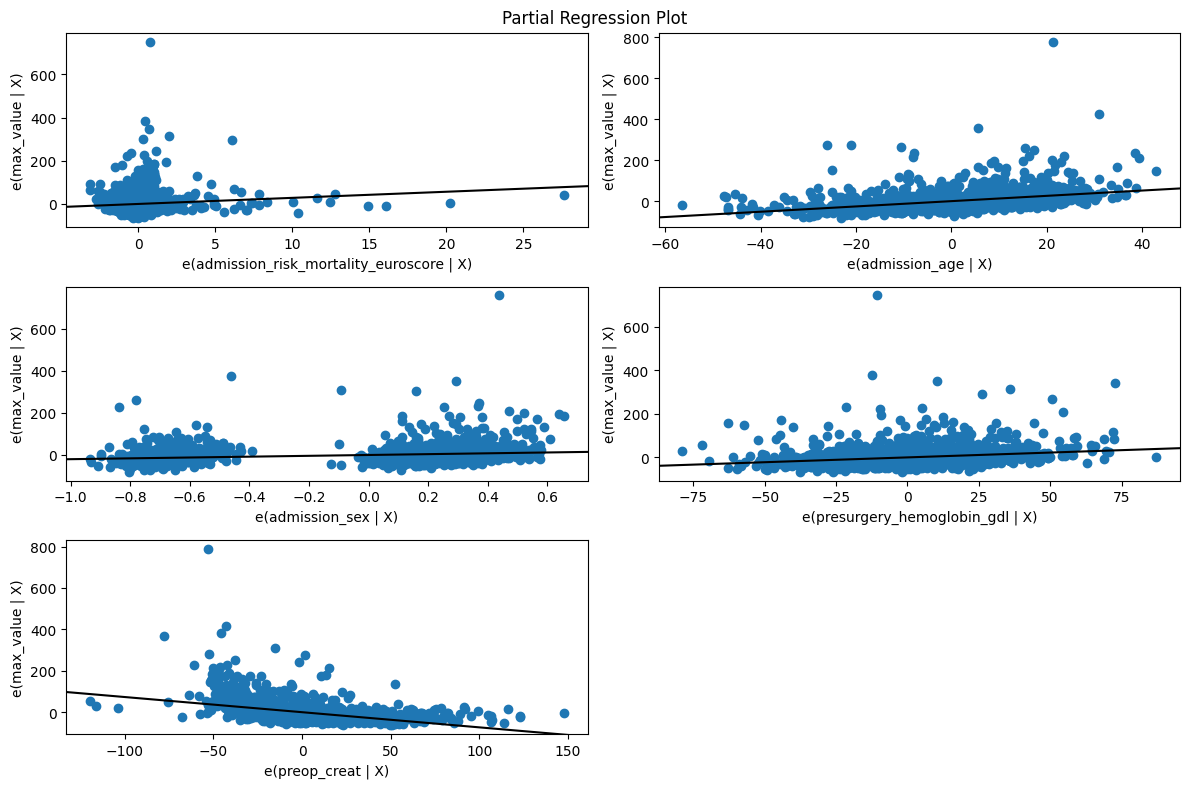

In [50]:
from statsmodels.graphics.regressionplots import plot_partregress_grid

fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(results, fig=fig)
plt.show()

In [51]:

from itertools import combinations
import itertools


# Generate all combinations of 2 or more independent variables
interaction_combinations = []
for r in range(2, len(X.columns) + 1):
    interaction_combinations.extend(list(itertools.combinations(X.columns, r)))

# Create interaction terms for each combination
for combination in interaction_combinations:
    interaction_name = 'interaction_' + '_'.join(combination)
    X[interaction_name] = X[list(combination)].prod(axis=1)

# Now, print the head of the DataFrame to check if the interaction terms are created
print(X.head())


   admission_risk_mortality_euroscore  admission_age  admission_sex  \
0                              0.0347             69              1   
1                              0.0270             74              1   
2                              0.0222             62              1   
3                              0.2043             62              0   
4                              0.0140             69              1   

   presurgery_hemoglobin_gdl  preop_creat  \
0                        130   111.569943   
1                        118    81.965992   
2                         93    68.024208   
3                        135    29.169984   
4                        109   100.288684   

   interaction_admission_risk_mortality_euroscore_admission_age  \
0                                             2.3943              
1                                             1.9980              
2                                             1.3764              
3                                 

/var/folders/y3/fw9x268x47l0njv69jv6qkz80000gn/T/ipykernel_1098/580892787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[interaction_name] = X[list(combination)].prod(axis=1)
/var/folders/y3/fw9x268x47l0njv69jv6qkz80000gn/T/ipykernel_1098/580892787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[interaction_name] = X[list(combination)].prod(axis=1)
/var/folders/y3/fw9x268x47l0njv69jv6qkz80000gn/T/ipykernel_1098/580892787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [92]:
y = y.dropna()
missing_y_indices = y[y.isnull()].index
X_clean = sm.add_constant(X_clean)
X_clean = X.drop(index=missing_y_indices)

endog_aligned, exog_aligned = X_clean.align(y, join='inner', axis=0)

family = sm.families.Gaussian()
model = sm.OLS(exog_aligned, endog_aligned)
results = model.fit()


In [93]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              max_value   R-squared (uncentered):                   0.845
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              1102.
Date:                Thu, 07 Mar 2024   Prob (F-statistic):                        0.00
Time:                        14:55:26   Log-Likelihood:                         -7423.3
No. Observations:                1422   AIC:                                  1.486e+04
Df Residuals:                    1415   BIC:                                  1.490e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                                                  coef    std err          t      P>|t|      [0.025     

In [63]:
df.head(
)

,Participant Id,DATE OF SURGERY,risk_heart_transplant,risk_transplant,risk_dialysis,risk_ecmo,risk_lvad,risk_perioperative_death,admission_cath_to_surgery,risk_which#diabetes,risk_which#eGFR_90_mLmin173m2,risk_diabetes_treatment,heart_failure,risk_other_which#history_of_smoking,risk_other_which#peripheral_vascular_disease,htn,risk_other_which#pulmonary_hypertension,risk_other_which#COPD,risk_other_which#cerebrovascular_disease,risk_other_which#recent_3_months_before_myocardial_infarct,risk_other_which#prior_cardiac_surgery,risk_other_which#other,risk_other_which#none,admission_risk_hf_nyha,admission_risk_hf_ejection_fraction,admission_risk_smoking,admission_risk_mortality_euroscore,admission_year,admission_age,admission_bmi,admission_weight,admission_height,admission_sex,admission_medication_class#insulin_ATC_code_A10A,admission_medication_class#SGLT2_inhibitor_ATC_code_A10BK,admission_medication_class#other_drug_for_diabetes_ATC_code_any_other_A10,admission_medication_class#ASA__aspirin_ARC_code_B01AC06,admission_medication_class#anticoagulant_ARC_code_B01,admission_medication_class#digoxin_ARC_code_C01AA05,admission_medication_class#antiarrhythmic_eg_amiodaron_ARC_code_C01B,admission_medication_class#aldosterone_antagonist_eg_spironolactone_ARC_code_C03D,admission_medication_class#diuretic_ARC_code_C03,admission_medication_class#betablocker_ARC_code_C07,admission_medication_class#calciumchannel_blocker__CCB_ARC_code_C08,admission_medication_class#ACEinhibitor__ACEi_ARC_code_C09A,admission_medication_class#atantagonist__angiotensinII_receptor_blockers_or_ARBs_ARC_code_C09C,admission_medication_class#gentamicin_or_vancomycin_ARC_code_J01GB03_or_J01XA01,admission_medication_class#lipid_modifying_agents_ARC_code_C10,surgery_which#coronary_artery_bypass_graft_CABG,surgery_which#aortic_valve_repair__replacement_AVR,surgery_which#mitral_valve_repair__replacement_MVR,surgery_which#aortic_surgery,surgery_which#other,surgery_cabg,surgery_aortic,surgery_other,surgery_duration_surgery_time_cut_close__hours,surgery_duration_surgery_time_cut_close__minutes,surgery_duration_time_of_extracorporeal_circulation_hours,surgery_duration_time_of_extracorporeal_circulation_minutes,surgery_duration_aortic_clamp_time_hours,surgery_duration_aortic_clamp_time_minutes,surgery_duration_calc,surgery_blood_products,surgery_blood_products_list#whole_blood,surgery_blood_products_list#fresh_frozen_plasma_FFP,surgery_blood_products_list#packed_red_blood_cells_pRBC,surgery_blood_products_list#platelet_transfusion,surgery_blood_products_list#cryoprecipitate,surgery_blood_whole_ml,surgery_blood_rbcp_ml,surgery_reexploration,surgery_events,surgery_events_specify,presurgery_albumin,presurgery_hemoglobin,presurgery_hemoglobin_gdl,presurgery_hemoglobin_mmol_l,presurgery_hb1ac,presurgery_hb1ac_percent,presurgery_hb1ac_mmol,presurgery_hb1ac_calc,presurgery_proteinuria#24hours_urine_protein,presurgery_proteinuria#UPCR_in_mgg,presurgery_proteinuria#UPCR_in_mgmmol,presurgery_proteinuria#dipstick,presurgery_proteinuria#other,presurgery_proteinuria#not_measured,presurgery_proteinuria_calc,presurgery_24hprotein,presurgeyr_upcr_mgg,presurgery_upcr_mgmmol,presurgery_dipstick,presurgery_proteinuria_other,prepostsurgery_creatinine,prepostsurgery_ethnicity,prepostsurgery_measurements_Last_measurement_pre_surgery_within_7_days_prior_to_surgery__Serum_creatinine_unit_as_mentioned_above_,preop_creat,baseline,prepostsurgery_measurements_Day_of_surgery_value_post_surgery__eGFR_in_mL_min_1.73m2_,prepostsurgery_measurements_Day_2_Serum_creatinine_unit_as_mentioned_above_,prepostsurgery_measurements_Day_2_eGFR_in_mL_min_1.73m2_,prepostsurgery_measurements_Day_3_Serum_creatinine_unit_as_mentioned_above_,prepostsurgery_measurements_Day_3_eGFR_in_mL_min_1.73m2_,prepostsurgery_measurements_Day_4_Serum_creatinine_unit_as_mentioned_above_,prepostsurgery_measurements_Day_4_eGFR_in_mL_min_1.73m2_,prepostsurgery_measurements_Day_5_Serum_creatinine_unit_as_mentioned_above_,prepostsurgery_measurem

KM CURVES

In [77]:
df['followup_d7alive'].unique()

df['followup90d_death'].unique()

array(['yes', 'no'], dtype=object)

In [84]:
# Create a new column 'time' with default value as 90
df['time'] = 90

# Update 'time' for patients who died within 7 days
df.loc[df['followup_d7alive'] == 0, 'time'] = 7

# Update 'time' for patients who survived beyond 7 days but died within 90 days
df.loc[(df['followup_d7alive'] == 1) & (df['followup90d_death'] == 1), 'time'] = 90

#Initialize 'status' column with default value indicating censoring
df['status'] = 0  # 0 indicates censoring (alive)

# Update 'status' based on whether the patient is alive or not at each time point
# Patients who died within 7 days
df.loc[df['time'] == 7, 'status'] = 1  # 1 indicates event occurred (dead)

# Patients who survived beyond 7 days but died within 90 days
df.loc[(df['time'] == 90) & (df['followup90d_death'] == 1), 'status'] = 1  # 1 indicates event occurred (dead)


In [81]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt


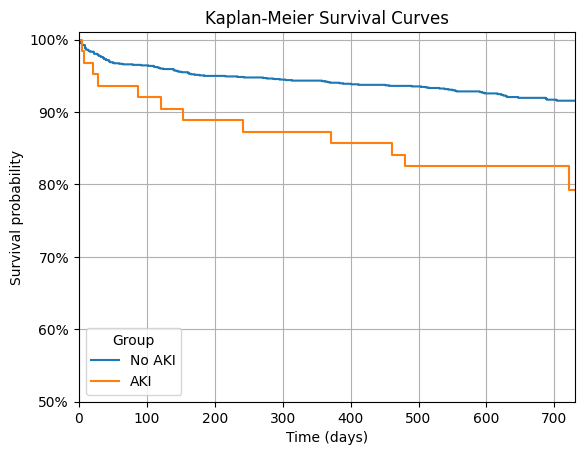

In [143]:
# Fit Kaplan-Meier curves for each group
kmf = KaplanMeierFitter()

for group in merged_df['AKI_or_not'].unique():
    group_data = merged_df[merged_df['AKI_or_not'] == group]
    kmf.fit(group_data['SURVIVAL'], event_observed=group_data['CENSOR'], label=group)
    kmf.plot(ci_show=False)
    
# Customize the plot
plt.title('Kaplan-Meier Survival Curves')
plt.xlabel('Time (days)')
plt.xlim(0, 730)
plt.yticks(ticks=[0.5, 0.6, 0.7, 0.8, 0.9, 1], labels=['50%', '60%', '70%', '80%', '90%', '100%'])
plt.ylabel('Survival probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

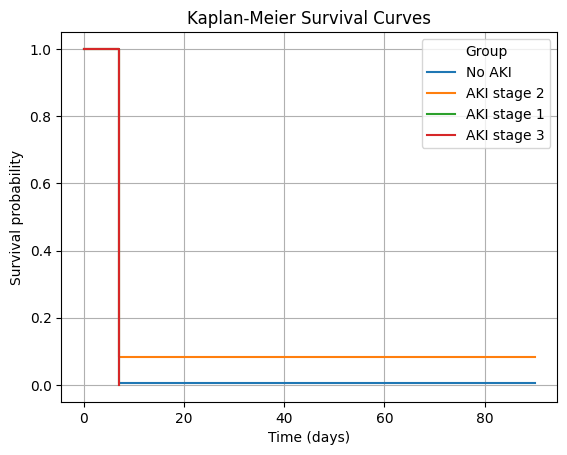

In [87]:
# Fit Kaplan-Meier curves for each group
kmf = KaplanMeierFitter()

for group in df['AKI_stage'].unique():
    group_data = df[df['AKI_stage'] == group]
    kmf.fit(group_data['time'], event_observed=group_data['status'], label=group)
    kmf.plot(ci_show=False)

# Customize the plot
plt.title('Kaplan-Meier Survival Curves')
plt.xlabel('Time (days)')
plt.ylabel('Survival probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()